In [3]:
import datapackage
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
!pip install datapackage

  Using cached https://files.pythonhosted.org/packages/9d/83/46e4f7d7bdf3cc4fa76f0ab7e7db3a890ae1c98a88e143a7f0eae7d031be/datapackage-1.6.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/8e/0788131b048fbb8b19dc94e60d40797f397c1feae905d3e27e3171a0520e/tableschema-1.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b1/98/6e841eb1c98cb4e80bca46b2f24c85e1727757ef2adbcc08a6d45c83e3bb/tabulator-1.23.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/18/b0/a80d29577c08eea401659254dfaed87f1af45272899e1812d7e01b679bc5/jsonpointer-2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9b/9f/b36f7774ff5ea8e428fdcfc4bb332c39ee5b9362ddd3d40d9516a55221b2/isodate-0.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/00/8d/9d56bfe43997f1864fe0891be69bc239ded98e69c9f56eb9eaa5b1789660/rfc3986-1.3.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.


In [4]:
data_url = 'https://datahub.io/sports-data/english-premier-league/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
df = pd.DataFrame()
all_season_data = {}
for resource in resources:
    if resource.tabular:
        all_season_data[resource.descriptor['datahub']['derivedFrom'][0]] = resource.descriptor['path']
        if resource.descriptor['datahub']['derivedFrom'][0] == 'season-0910':
        	break
all_res = []
for each in all_season_data:
	a = pd.DataFrame(pd.read_csv(all_season_data[each], usecols=['Date','HomeTeam','AwayTeam','Referee','HF','AF']))
	a['Season'] = each
	all_res.append(a)
df = pd.concat(all_res)

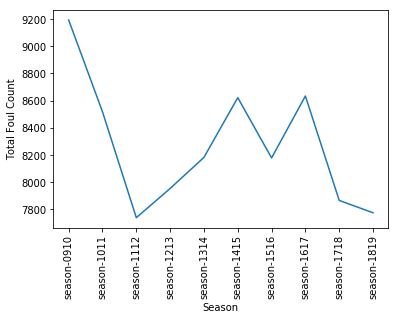

In [12]:

# setting data for total foul count per season
ses = df.groupby('Season')
foul_count = ses['HF','AF'].sum()
foul_count['Total'] = foul_count['HF'] + foul_count['AF']
plt.xlabel('Season')
plt.ylabel('Total Foul Count')
plt.xticks(rotation=90)
plt.plot(foul_count.Total)

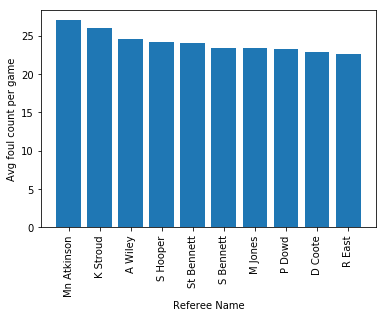

In [14]:
# setting data for avg foul per game shown by top 10 refree
ref = df.groupby('Referee')
ref_foul_count = ref['HF','AF'].sum()
ref_foul_count['Total'] = ref_foul_count['HF'] + ref_foul_count['AF']
ref_foul_count['Count'] = 0
ref_dict = Counter(df['Referee'])
for each in ref_dict:
	ref_foul_count['Count'][ref_foul_count.index.values == each] = ref_dict[each]
ref_foul_count["Avg"] = ref_foul_count['Total'] / ref_foul_count['Count']
plt.xlabel('Referee Name')
plt.ylabel('Avg foul count per game')
plt.xticks(rotation=90)
plt.bar(ref_foul_count.nlargest(10,'Avg').index.values,ref_foul_count.nlargest(10,'Avg')['Avg'])
plt.show()